# 1 Import de bibliotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier    # MLP

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2 Leitura dos dados

In [2]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df = pd.concat([df_train,df_test],ignore_index=True)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 46.5+ MB


## 3 Limpeza

## 3.1 Valores nulos

In [6]:
df.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [7]:
df = df[(df['Response'] == 1) | (df['Response'] == 0)]
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0.0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0.0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0.0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0


## 3.2 Valores duplicados

Chave primária da tabela é a 'id'

In [8]:
len(df)

381109

In [9]:
df = df.drop_duplicates(subset=['id'])
len(df)

381109

In [10]:
## Excluindo a chave primária
df = df.drop(columns=['id'])
len(df)

381109

## 4.0 Pré-processamento - Encoding

Aplicaremos o Label Encoding, no entanto, manteremos o código da V.1.0 desse notebook que inputava valores manualmente para cada feature categórica.

In [11]:
### Preparando a base de dados para treinamento
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['Vehicle_Age'] = df['Vehicle_Age'].map( {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2 } ).astype(int)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


## 5.0 EDA - Analise de dados - SIMPLES
A análise de dados mais aprofundada foi realizada no PowerBI está disponibilizada no repositório

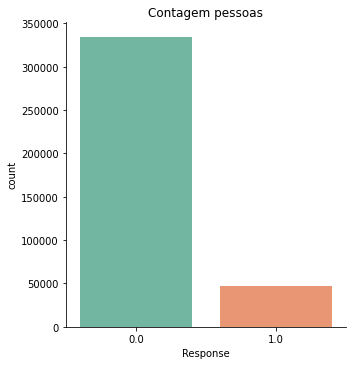

In [12]:
%matplotlib inline
sns.catplot(x="Response", kind="count", palette="Set2", data= df).set(title="Contagem pessoas")

- Os dados estão desbalanceados, tereemos que utilizar técnicas para balanceamento.

# 6 Definição da função de custo para seleção de modelos de ML

Definições:

- <b>Custo abordagem - FP:</b> Custos relacionados a abordagem de clientes sem interesse devido ao erro de classificação da classe 0 (Falso Positivo - FP)

- <b>Custo oportunidade - FN:</b> Custos relacionados ao custo de oportunidade da não abordagem e aquisição de seguros de veículos por clientes com interesse devido ao erro de classificação da classe 1 (Falso Negativo - FN)

## 6.1 Custo FP (Abordagem)

- Um mês tem em média 160 horas trabalhadas, 
- Supondo que cada telefonema para oferta do seguro tem uma duração de 20
- Supondo que um telefonema de 20 minutos custa 2,00 reais
- Supondo que a média do salário de um vendedor seja 2.500,00 reais mensais
- A hora de um vendedor custa 15,62 reais.
- O custo médio para deslocamento do vendedor ao cliente é de 12 reais.
- Um vendedor demora cerca de 2 horas de deslocamento ida e volta até o cliente.

        Custo_FP = 2 (Custo telefonema) + 20/60  * 15,62 (Horas trabalhadas) = 7,21  
        Custo_FP = 2 (Custo telefonema) + 120/60 * 15,62 (Horas trabalhadas) + 12 (Combustivel) = 45,24

Como não há informações sobre como os clientes são abordados adotaremos a média simples para calcular a média do custo de abordagem:

<b> Custo_FP </b> = (7,21 + 45,24) / 2 = 26,225


In [13]:
Custo_FP = (7.21 + 45.24) / 2
Custo_FP

26.225

## 6.2 Custo FN (de oportunidade)

####  6.2.2 Custo de oportunidade
- Supondo que a parcela de um seguro de saúde seja de 70 reais ou 840,00 anuais.
- Supondo que o valor do seguro de veículo seja igual ao seguro de saúde.

Custo_FN = Valor seguro do veículo - Custo abordagem do cliente  
Custo_FN = 840 - 26,23  
Custo_FN = 813,77  

In [14]:
Custo_FN = 813.77
Custo_FN

813.77

# 6.4 Função custo total

        Custo total = (Quantidade_FP * Custo_FP) + (Quantidade_FN * Custo_FN)

In [15]:
from sklearn.metrics import confusion_matrix
def funcao_custo(y_verdadeiro, y_predito):
    
    ## Quantidade FP    
    qtde_FP = confusion_matrix(y_verdadeiro,y_predito)[0][1]
    
    ## Quantidade FN
    qtde_FN = confusion_matrix(y_verdadeiro,y_predito)[1][0]
    
    ## Função de custo
    custo = qtde_FP * Custo_FP + qtde_FN * Custo_FN
    
    return custo  

In [16]:
## Exemplo custo com 1 erro pessoa interessada e 1 erro pessoa não interessada
funcao_custo(np.array([0,0,0,1,1,1]),np.array([0,0,1,1,1,0]))

839.995

In [17]:
from sklearn.metrics import fbeta_score, make_scorer
custo_func = make_scorer(funcao_custo, greater_is_better=False)

## 6.5 TradeOff Custos:

Dado que na nossa base de dados há maior proporção de pessoas sem o interesse no seguro. 

Qual o tradeoff na diminuição da taxa de acertos de pessoas com interesse no incremento de 1% da taxa de acertos de pessoas com interesse? O que o modelo irá priorizar segundo essa função de custo?

In [18]:
n_clientes_sem_interesse = df.Response.value_counts()[0]
um_perc_sem_interesse = 0.01 * n_clientes_sem_interesse
um_perc_sem_interesse

3343.9900000000002

Para essa base de dados um incremento de 1% na taxa de acerto de pessoas sem interesse equivale a acertar 3343 clientes. Acertar essa quantidade transações equivale a uma economia de:

        Economia = Acertos * Custo_FP

In [19]:
economia = um_perc_sem_interesse * Custo_FP
economia

87696.13775000001

Essa mesma economia equivale a um acerto de X clientes com interesse no seguro onde:

    Economia = X_interessados * Custo_FN

    X_interessados = Economia / Custo_FN

In [20]:
X_interessados = economia/ Custo_FN 
X_interessados

107.76526260491295

In [21]:
n_clientes_interessados =  df.Response.value_counts()[1]

perc_interessados = X_interessados / n_clientes_interessados * 100
perc_interessados

0.23071133077480827

## Conclusão:
- Dado o desbalanceamento das classes e os custos o modelo priorizará o acerto de 1 cliente interessado em detrimento de 107 clientes não interessados.
- Isso equivale a dizer que o modelo priorizará no tradeoff um ganho de +23% (+1) na taxa de acerto de pessoas interessadas em detrimento de -1% na taxa de acertos de pessoas sem interesse.

# 7 Amostragem estratificada: 80% Treino e Valid / 20% Teste

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['Response'], axis=1)
y = df['Response']

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
y_test.value_counts()

0.0    66880
1.0     9342
Name: Response, dtype: int64

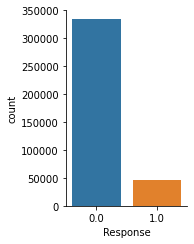

In [23]:
sns.catplot(x="Response",
                data=df,
                kind="count", height=3.5, aspect=.8)

A base está desbalanceada, devemos aplicar tecnicas de balanceamento antes de treinar modelos

# 8.0 Prototipação

Na versão 1.0 do Projeto realizamos experimentos para escolher o melhor modelo e chegamos a conclusão que o RandomForest performava melhor. 

Para a V 2.0 desse projeto, iremos refazer a prototipação pois a V 1.0 continha algums erros.

In [24]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_test = pd.DataFrame()

fator_balanc = [0.3,0.5,0.8,1]

#Loop numero de repetições do experimento
for rep in range(1):
    
   ##Loop do dicionário Sentilex Escolhido: 
    for fator in fator_balanc:
        
        print("Iterando fator de balanc = {} - Repetição = {}".format(fator,rep))
        

        #Dados de teste
        X_test2 = X_test
        y_test2 = y_test
        
        ##Balanceando dados treino + valid
        nr = NearMiss(sampling_strategy=fator)
        X_train_valid_balanc, y_train_valid_balanc = nr.fit_resample(X_train_valid, y_train_valid)


        #Dados de treino = treino+valid
        X_train4 = X_train_valid_balanc
        y_train4 = y_train_valid_balanc
            
        

        # Normalizando - FIT APENAS TREINO
        scaler = StandardScaler()
        scaler.fit(X_train4)
        
        
        X_train_norm = scaler.transform(X_train4)
        
        X_test_norm = scaler.transform(X_test2)
        
        
        
        ########################### Previsao dados teste ###########################
                #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['Fator_balanc'] = fator
        models['Normalizacao'] = "NAO"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['Fator_balanc'] = fator
        models['Normalizacao'] = "SIM"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

C:\Users\HP ZBook 15\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Iterando fator de balanc = 0.3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [19:43<00:00, 40.81s/it]


Iterando fator de balanc = 0.5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [27:08<00:00, 56.15s/it]


Iterando fator de balanc = 0.8 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [15:16<00:00, 31.60s/it]


Iterando fator de balanc = 1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [09:27<00:00, 19.56s/it]


In [44]:
df_prototipacao = df_models_test


## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','Fator_balanc','Normalizacao']).agg({'Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score': np.mean, "Time Taken":np.mean}).sort_values(by='ROC AUC', ascending=False)
df2 = df_agrupado.reset_index()
df2.head(50)

,Model,n_PCA,Fator_balanc,Normalizacao,Accuracy,ROC AUC,F1 Score,Time Taken
0,GaussianNB,N/A,0.50,SIM,0.64,0.78,0.70,0.30
1,GaussianNB,N/A,0.50,NAO,0.64,0.78,0.70,0.29
2,GaussianNB,N/A,0.30,NAO,0.64,0.78,0.70,0.40
3,QuadraticDiscriminantAnalysis,N/A,0.30,NAO,0.64,0.78,0.70,0.43
4,QuadraticDiscriminantAnalysis,N/A,0.30,SIM,0.64,0.78,0.70,0.36
5,GaussianNB,N/A,0.30,SIM,0.64,0.78,0.70,0.29
6,QuadraticDiscriminantAnalysis,N/A,0.50,SIM,0.64,0.78,0.70,0.28
7,QuadraticDiscriminantAnalysis,N/A,0.50,NAO,0.64,0.78,0.70,0.30
8,GaussianNB,N/A,0.80,SIM,0.64,0.78,0.70,0.24
9,GaussianNB,N/A,0.80,NAO,0.64,0.78,0.70,0.26


Candidatos á modelagem:
    - GaussianNB

# 9 Machine Learning

O codigo abaixo é responsável por selecionar:

- Melhor taxa de balanceamento aplicado APENAS em dados de treino
- Melhor conjunto de hiperparâmetros baseado na função de custo
- Melhor Quantidade de features (k = num_features)
- Melhor conjunto de features
- Pipelines sem seleção de features
- Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
- Pipelines com aplicação de PCA (iterado sobre k-1 features á k-3 features)

Metodologia:

Cada pipeline foi treinada 5x em um conjunto distinto de 80% dos dados de treino para cada conjunto de taxa de balanceamento, hiperparametros, conjunto de features selecionadas.

As médias do recall, precisao, acurácia sobre os dados de VALIDAÇÃO e também TESTES foram calculadas sobre as 5 repetições para selecionar os melhores modelos

Boas práticas:

 - Seleção dos hiperparâmetros utilizando dados de VALIDAÇÂO
 - Avaliação das métricas sobre dados de VALIDAÇÂO e dados de TESTE.
 - Seleção do melhor modelo utilizando métricas dos dados de TESTE.

In [77]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


import random
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss 
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score


## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
#scoring = {"accuracy": acuracia_dados, "f1":f1_dados}
#scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score, 'f2': ftwo_scorer}
#scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, 'f2': ftwo_scorer}
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, 'f2': ftwo_scorer, 'custo':custo_func}



custo_minimo = 9999999999
maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0


weights = np.linspace(0.01,0.99,20)
list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

#list_class_weights = [{0: 0.8352631578947368, 1: 0.16473684210526318}]


#Split = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] #Proporções testadas no balanceamento de classes
#Split = [0.14,0.17,0.2,0.25]
Split = [0.25]

num_holdouts = 5

#Loop de seed aleatória
for seed in range(1):
    
    
    #print("Iterando seed = {}".format(seed))


    ################ Definição de modelos candidatos ################
    #model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
    model2 = GaussianNB()
    
    #models = [model1]
    #nome_modelo = ['RandomForest']
    
    models = [model2]
    nome_modelo = ['GaussianNB']

    
    ##Loop Balanceamento de classes     
    for fator_balanc in Split:
        
            
        print("Iterando seed = {}, fator balanc = {}".format(seed,fator_balanc))
        
      
        nr = NearMiss(sampling_strategy=fator_balanc)
        X_train_valid_balanc, y_train_valid_balanc = nr.fit_resample(X_train_valid, y_train_valid)
        
        ##Holdout 70% treino e 30% validação
        X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_balanc, y_train_valid_balanc, test_size=0.3, random_state=seed, stratify=y_train_valid_balanc)

        
        ### Definindo índices de treino e índices de validação para usá-los na seleção de hiperparâmetros no GridSearch
         
        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)
                
        
        ############################# Paramgrid de modelos ###############################

        ##Grid model 1 RandomForest
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy'], "n_estimators":[100,150,200]}
        #param_grid1={"max_depth":[None], "min_samples_split":[2], "min_samples_leaf":[1], "criterion":['gini'], "n_estimators":[100], "class_weight": list_class_weights}
        #param_grid1={"max_depth":[None], "min_samples_split":[2], "min_samples_leaf":[1], "criterion":['gini'], "n_estimators":[100]}
        #param_grid1={"max_depth":[None], "min_samples_split":[2], "min_samples_leaf":[1], "criterion":['gini'], "n_estimators":[100], "class_weight": list_class_weights } 
        
        ##Grid model 2: GaussianNB        
        #param_grid2={"var_smoothing":[0.00001,0.000001,0.0000001,0.00000001,0.000000001]} 
        #param_grid2={"var_smoothing":[0.00001,0.0001,0.001,0.01,0.1,1,10,100]} 
        param_grid2={"var_smoothing":[0.00001]} 
        
        
        #list_param_grids = [param_grid1]
        list_param_grids = [param_grid2]

        dictionary_paramgrid = dict(zip(models, list_param_grids))

        

        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############################ GridSearch de modelos candidatos com todas features ###############################
            #gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f2", n_jobs=-1, cv = ps )
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="custo", n_jobs=-1, cv = ps )
            
            #Fit dados 
            gs.fit(X_train_valid_balanc,y_train_valid_balanc)

            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar superestimar os scores ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train,y_train)



            #Loop Seletor de features:
            #for k in range(X_train.shape[1], X_train.shape[1]+1, 1):  ## Iterar sobre n total de features e n (n = max)
            #for k in range(5,11,1):  ## Iterar sobre 5 á 10 features
            for k in range(9,10,1):  ## Iterar sobre 9 á 9 features


            
                print("Iterando num_features = {}".format(k))

                #############################  Seletor aleatório features  ############################

                selected = np.random.choice(X_train.columns, k, replace=False)
                
                #Ordem alfabetica das features
                #selected = ['Age','Previously_Insured','Vehicle_Damage','Annual_Premium','Vintage']
                selected = sorted(selected)
                
                #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                for qtde_holdout in range(1,num_holdouts+1):

                    seed_holdout = random.randint(0,9999)
                    X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_holdout, stratify=y_train)

                    
                    #X_train4 = X_train
                    #y_train4 = y_train
                    
                    ## Renomeando valid e teste para ficar com mesmo índice de X_train
                    X_valid4 = X_valid
                    y_valid4 = y_valid
                    
                    X_test4 = X_test
                    y_test4 = y_test

                    #Fit do modelo aos 80% dos dados de treino selecionados pelo holdout aleatório
                    modelo_tunado.fit(X_train4, y_train4)


                    ## modelo seletor de feature
                    modelo_seletor = RandomForestClassifier(random_state=seed, n_jobs=-1)
                    modelo_seletor.fit(X_train4, y_train4)

                    ################ Definição de Pipelines com modelo tunado ################

                    ##Com Seletor K
                    pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                    pipe2 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                    pipe3 = Pipeline([('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])


                    ## Com seletor aleatorio
                    pipe4 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe5 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe6 = Pipeline([(nome_modelo_testado, modelo_tunado)])

                    ## Com PCA
                    pipe7 = Pipeline([('PCA', PCA(n_components=k)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe8 = Pipeline([('PCA', PCA(n_components=k)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe9 = Pipeline([('PCA', PCA(n_components=k)),(nome_modelo_testado, modelo_tunado)])

                    ## Com seletor aleatorio + PCA de k-1 features á k-3 features
                    pipe10 = Pipeline([('PCA', PCA(n_components=k-1)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe11 = Pipeline([('PCA', PCA(n_components=k-1)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe12 = Pipeline([('PCA', PCA(n_components=k-1)),(nome_modelo_testado, modelo_tunado)])

                    pipe13 = Pipeline([('PCA', PCA(n_components=k-2)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe14 = Pipeline([('PCA', PCA(n_components=k-2)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe15 = Pipeline([('PCA', PCA(n_components=k-2)),(nome_modelo_testado, modelo_tunado)])

                    pipe16 = Pipeline([('PCA', PCA(n_components=k-3)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe17 = Pipeline([('PCA', PCA(n_components=k-3)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                    pipe18 = Pipeline([('PCA', PCA(n_components=k-3)),(nome_modelo_testado, modelo_tunado)])



                    pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8,pipe9,pipe10,pipe11,pipe12,pipe13,pipe14,pipe15,pipe16,pipe17,pipe18]


                    #Loop das pipelines testadas com seletor de features e outras etapas:
                    for num_pipe, pipe in enumerate(pipelines):

                        # features aleatorias aplicado ao  PIPE4 á PIPE6
                        if num_pipe in [3,4,5]:

                            X_train5 = X_train4[selected]
                            y_train5 = y_train4

                            X_valid5 = X_valid4[selected]

                            X_test5 = X_test4[selected]

                            ## Nome das features selecionadas aleatoriamente
                            features_selecionadas = ','.join(list(selected))


                        if num_pipe in [0,1,2]:

                            X_train5 = X_train4
                            y_train5 = y_train4

                            X_valid5 = X_valid4
                            y_valid5 = y_valid4

                            X_test5 = X_test4
                            y_test5 = y_test4

                            ## Nome das features selecionadas pelo SelectFromModel
                            selector = SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)
                            selector.fit(X_train5,y_train5)
                            mask = selector.get_support()
                            features_selecionadas = ','.join(list(X_train5.columns[mask]))

                        if num_pipe in [6,7,8]:

                            X_train5 = X_train4
                            y_train5 = y_train4

                            X_valid5 = X_valid4
                            y_valid5 = y_valid4

                            X_test5 = X_test4
                            y_test5 = y_test4

                            features_selecionadas = ','.join(list(selected))

                        # features aleatorias aplicado ao  PIPE10 á PIPE16    
                        if num_pipe >=9:

                            X_train5 = X_train4[selected]
                            y_train5 = y_train4

                            X_valid5 = X_valid4[selected]

                            X_test5 = X_test4[selected]

                            ## Nome das features selecionadas aleatoriamente
                            features_selecionadas = ','.join(list(selected))

                        ############################ Fit Pipeline #################

                        pipe.fit(X_train5,y_train5)


                        #Armazenando propriedades das PIPES
                        if num_pipe == 0:
                            seletor_feature = "SelectFromModel"
                            scaler = "StandardScaler"

                        if num_pipe == 1:
                            seletor_feature = "SelectFromModel"
                            scaler = "MinMax"

                        if num_pipe == 2:
                            seletor_feature = 'SelectFromModel'
                            scaler = "Sem Scaler"

                        if num_pipe == 3:
                        #if num_pipe == 0:
                            seletor_feature = "Aleatorio"
                            scaler = "StandardScaler"

                        if num_pipe == 4:
                            seletor_feature = "Aleatorio"
                            scaler = "MinMax"

                        if num_pipe == 5:
                            seletor_feature = "Aleatorio"
                            scaler = "Sem Scaler"

                        if num_pipe == 6:
                            seletor_feature = "PCA k=num_feat"
                            scaler = "StandardScaler"

                        if num_pipe == 7:
                            seletor_feature = "PCA k=num_feat"
                            scaler = "MinMax"

                        if num_pipe == 8:
                            seletor_feature = "PCA k=num_feat"
                            scaler = "Sem Scaler"


                        if num_pipe == 9:
                            seletor_feature = "Aleatório e PCA k-1"
                            scaler = "StandardScaler"

                        if num_pipe == 10:
                            seletor_feature = "Aleatório e PCA k-1"
                            scaler = "MinMax"

                        if num_pipe == 11:
                            seletor_feature = "Aleatório e PCA k-1"
                            scaler = "Sem Scaler"



                        if num_pipe == 12:
                            seletor_feature = "Aleatório e PCA k-2"
                            scaler = "StandardScaler"

                        if num_pipe == 13:
                            seletor_feature = "Aleatório e PCA k-2"
                            scaler = "MinMax"

                        if num_pipe == 14:
                            seletor_feature = "Aleatório e PCA k-2"
                            scaler = "Sem Scaler"


                        if num_pipe == 15:
                            seletor_feature = "Aleatório e PCA k-3"
                            scaler = "StandardScaler"

                        if num_pipe == 16:
                            seletor_feature = "Aleatório e PCA k-3"
                            scaler = "MinMax"

                        if num_pipe == 17:
                            seletor_feature = "Aleatório e PCA k-3"
                            scaler = "Sem Scaler"

                        ################ Calculando métricas da pipe DADOS NÃO VISTOS - TESTE ################
                        ################ DADOS DE TESTE

                        # Fazendo predição
                        p = pipe.predict(X_test5)

                        contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                        #Calculando o recall
                        recall_0 = recall_score(y_test5, p, pos_label=0)
                        recall_1 = recall_score(y_test5, p, pos_label=1)

                        #Calculando Precision
                        precision_0 = precision_score(y_test5, p, pos_label = 0)
                        precision_1 = precision_score(y_test5, p, pos_label = 1)

                        #Calculando acurácia
                        accuracy = accuracy_score(y_test5, p)

                        #Calculando AUC
                        auc = roc_auc_score(y_test5, p)

                        #Calculando custo
                        custo = funcao_custo(y_test5, p)

                        ################ Calculando métricas da pipe DADOS NÃO VISTOS, subamostragem dos dados de treino ################
                        ################ - DADOS DE VALIDACAO

                        # Fazendo predição
                        p = pipe.predict(X_valid5)

                        #Calculando o recall
                        recall_0_valid = recall_score(y_valid5, p, pos_label=0)
                        recall_1_valid = recall_score(y_valid5, p, pos_label=1)

                        #Calculando Precision
                        precision_0_valid = precision_score(y_valid5, p, pos_label = 0)
                        precision_1_valid = precision_score(y_valid5, p, pos_label = 1)

                        #Calculando acurácia
                        accuracy_valid = accuracy_score(y_valid5, p)

                        #Calculando AUC
                        auc_valid = roc_auc_score(y_valid5, p)

                        # Calculando Custo
                        custo_valid = funcao_custo(y_valid5, p)

                        ##Media AUC valid e AUC teste
                        auc_valid_teste = (auc + auc_valid) / 2


                       ################ Armazenando e imprimindo os resultados  ################

                        dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))
                         
                        if num_modelo ==0:
                            
                            col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','fator_balanceamento','num_pipe', 'qtde_features', 'features','metodo selecao', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid', 'auc_valid_teste','custo']                             
                            resultados_model1.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,fator_balanc, num_pipe+1,k,features_selecionadas,seletor_feature, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid, auc_valid_teste,custo ]))

                        
                        if num_modelo ==1:
                            
                            col_names_modelo2 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','fator_balanceamento','num_pipe', 'qtde_features', 'features','metodo selecao', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid', 'auc_valid_teste','custo']                             
                            resultados_model2.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,fator_balanc, num_pipe+1,k,features_selecionadas,seletor_feature, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid, auc_valid_teste,custo ]))
                        
                        #if auc > maximo_auc:
                        if custo < custo_minimo:

                            #if metrica < 0 or metrica > limite_maximo_tolerado:
                                print("============================================================================================================================")
                                print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC Valid = {} - Custo erros = {}".format(nome_modelo_testado, auc, auc_valid, custo))                   
                                print("     Características dados de treino: Fator de balanceamento = {}".format(fator_balanc))
                                print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                print("     Features Selecionadas = {}".format(features_selecionadas))
                                print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                                print("============================================================================================================================")


                                melhor_modelo = pipe
                                maximo_auc = auc
                                custo_minimo = custo
                                best_seed = seed

                        #break

Iterando seed = 0, fator balanc = 0.25
Iterando num_features = 9
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  GaussianNB - AUC teste = 0.7827508603810132 - AUC Valid = 0.7698469651058703 - Custo erros = 892917.605
     Características dados de treino: Fator de balanceamento = 0.25
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'var_smoothing': 1e-05}
     Características das features selecionadas: num_features = 9 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
     DADOS TESTE - Recall 0 = 0.5878738038277512 - Recall 1 = 0.9776279169342753 
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  GaussianNB - AUC teste = 0.7827583364575682 - AUC Valid = 0.7698581153667863 - Custo erros = 892891.3800000001
     Características dados de treino: Fator de balanceamen

## Resultados modelo

In [79]:
####### Resultados Modelo 1: DecisionTree

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[9:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:9]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[2:9]

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_agrupado = resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, 'auc_valid': np.mean, 'custo': np.mean})
df_agrupado['media_auc_valid_teste'] = (df_agrupado['auc'] + df_agrupado['auc_valid']) /2
df_agrupado = df_agrupado.sort_values(by='custo', ascending=True)
df_agrupado[0:50]

contagem_exp  \
var_smoothing modelo     fator_balanceamento num_pipe qtde_features features                                           metodo selecao                      
1e-05         GaussianNB 0.25                1        9             Gender,Age,Region_Code,Previously_Insured,Vehic... SelectFromModel                 5   
                                             2        9             Gender,Age,Region_Code,Previously_Insured,Vehic... SelectFromModel                 5   
                                             5        9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatorio                       5   
                                             4        9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatorio                       5   
                                             11       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-1             5   
                                             10       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-1             5   
                                             8        9             Age,Annual_Premium,Driving_License,Gender,Polic... PCA k=num_feat                  5   
                                             7        9             Age,Annual_Premium,Driving_License,Gender,Polic... PCA k=num_feat                  5   
                                             16       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-3             5   
                                             17       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-3             5   
                                             13       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-2             5   
                                             14       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-2             5   
                                             6        9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatorio                       5   
                                             3        9             Gender,Age,Region_Code,Previously_Insured,Vehic... SelectFromModel                 5   
                                             15       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-2             5   
                                             12       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-1             5   
                                             18       9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatório e PCA k-3             5   
                                             9        9             Age,Annual_Premium,Driving_License,Gender,Polic... PCA k=num_feat                  5   

                                                                                                                                            acuracia  \
var_smoothing modelo     fator_balanceamento num_pipe qtde_features features                                           metodo selecao                  
1e-05         GaussianNB 0.25                1        9             Gender,Age,Region_Code,Previously_Insured,Vehic... SelectFromModel      0.635633   
                                             2        9             Gender,Age,Region_Code,Previously_Insured,Vehic... SelectFromModel      0.635633   
                                             5        9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatorio            0.636942   
                                             4        9             Age,Annual_Premium,Driving_License,Gender,Polic... Aleatorio            0.636942   
                                             11       9             Age,Annual_Premium,Driving_License,Gend

## Seleção de candidatos

In [80]:
##Candidatos: 
candidato = df_agrupado[0:1]
candidato

,,,,,,,contagem_exp,acuracia,recall_0,recall_1,prec_0,prec_1,auc,auc_valid,custo,media_auc_valid_teste
var_smoothing,modelo,fator_balanceamento,num_pipe,qtde_features,features,metodo selecao,,,,,,,,,,
1e-05,GaussianNB,0.25,1,9,"Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage",SelectFromModel,5,0.635633,0.587862,0.977628,0.994712,0.248877,0.782745,0.769822,892938.585,0.776284


In [83]:
pd.set_option('display.max_columns', 50)

########## #RandomForest
#df_rf_candidatos = pd.DataFrame()
#df_rf_candidatos = pd.read_csv('df_rf_candidatos.csv')
#df_rf_candidatos = df_rf_candidatos.append(candidato.reset_index(), ignore_index=True)

#df_rf_candidatos.to_csv('df_rf_candidatos.csv',index=False)
#df_rf_candidatos




########## GaussianNB
#df_gaussian_candidatos = pd.DataFrame()
df_gaussian_candidatos = pd.read_csv('df_gaussian_candidatos.csv')
df_gaussian_candidatos = df_gaussian_candidatos.append(candidato.reset_index(), ignore_index=True)


df_gaussian_candidatos.to_csv('df_gaussian_candidatos.csv',index=False)
df_gaussian_candidatos

,var_smoothing,modelo,fator_balanceamento,num_pipe,qtde_features,features,metodo selecao,contagem_exp,acuracia,recall_0,recall_1,prec_0,prec_1,auc,auc_valid,custo,media_auc_valid_teste
0,1e-05,GaussianNB,0.25,1,9,"Gender,Age,Region_Code,Previously_Insured,Vehi...",SelectFromModel,5,0.635622,0.587850,0.977628,0.994712,0.248872,0.782739,0.769811,892959.565,0.776275
1,1e-05,GaussianNB,0.25,1,9,"Gender,Age,Region_Code,Previously_Insured,Vehi...",SelectFromModel,5,0.635622,0.587850,0.977628,0.994712,0.248872,0.782739,0.769811,892959.565,0.776275
2,1e-05,GaussianNB,0.25,2,6,"Age,Region_Code,Previously_Insured,Vehicle_Dam...",SelectFromModel,5,0.635620,0.587847,0.977628,0.994712,0.248871,0.782737,0.769802,892964.810,0.776270
3,1e-05,GaussianNB,0.25,1,9,"Gender,Age,Region_Code,Previously_Insured,Vehi...",SelectFromModel,5,0.635633,0.587862,0.977628,0.994712,0.248877,0.782745,0.769822,892938.585,0.776284


# Persistencia do melhor modelo em disco

In [84]:
melhor_modelo = pipe1
melhor_modelo

Pipeline(steps=[('scaler', StandardScaler()),
                ('seletor',
                 SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1,
                                                                  random_state=0),
                                 max_features=9, threshold=-inf)),
                ('GaussianNB', GaussianNB(var_smoothing=1e-05))])

In [85]:
import joblib
joblib.dump(melhor_modelo, 'modelo-GaussianNB.pkl',compress=4)

['modelo-GaussianNB.pkl']

# 10 Métricas do modelo

In [86]:
import joblib
import os
model = joblib.load(open(os.path.join('modelo-GaussianNB.pkl'),"rb"))
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('seletor',
                 SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1,
                                                                  random_state=0),
                                 max_features=9, threshold=-inf)),
                ('GaussianNB', GaussianNB(var_smoothing=1e-05))])

In [87]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

############ INPUT:
seed = 0
num_pipe = 1
fator_balanc = 0.25
#lista_features = ['Age','Previously_Insured','Vehicle_Damage','Annual_Premium','Vintage']


#Balanceamento
nr = NearMiss(sampling_strategy=fator_balanc)
X_train_valid_balanc, y_train_valid_balanc = nr.fit_resample(X_train_valid, y_train_valid)
        
##Holdout 80% treino e 20% validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_balanc, y_train_valid_balanc, test_size=0.2, random_state=seed, stratify=y_train_valid_balanc)

## Dados treino
#X_test
#y_test


#Seletor aleatório de feature
if num_pipe == 3:
    X_train3 = X_train3[seletor_aleatorio]
    X_valid3 = X_valid3[seletor_aleatorio]

    
#fit treino
model.fit(X_train,y_train)

#predict teste
p = model.predict(X_test)


############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Test:\n",classification_report(y_test, p))
print("")
print("Confusion Matrix Dados - Test:\n",confusion_matrix(y_test, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test, p, pos_label=0)
recall_1 = recall_score(y_test, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test, p, pos_label = 0)
precision_1 = precision_score(y_test, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, p)

#Calculando AUC
auc = roc_auc_score(y_test, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
#print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Test:
               precision    recall  f1-score   support

         0.0       0.99      0.59      0.74     66880
         1.0       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222


Confusion Matrix Dados - Test:
 [[39315 27565]
 [  209  9133]]

Recall_0: 0.5878438995215312
Recall_1: 0.9776279169342753
Precision_0: 0.9947120736767534
Precision_1: 0.24886914818246225
Acuracia: 0.6356170134606807
AUC: 0.7827359082279033


## 11 Experimentos: Quantas pessoas passariam a ter interesse após oferecer desconto?

## 11.1 Qual maior desconto que podemos oferecer sem causar prejuizos ao negócio?

In [109]:
media_seguro_saude_base_desinteressados = df[(df['Response']==0)].Annual_Premium.mean()
media_seguro_saude_base_desinteressados

perc_desconto = Custo_FN / media_seguro_saude_base_desinteressados
perc_desconto

0.026751889027415893

## 11.2 Oferecendo 2% de desconto

Caso já tivessemos implementado esse modelo de Machine Learning antes de oferecer o seguro de veículos aos clientes seria possível realizar uma predição direto sobre a base de clientes. 

No entanto, parte da base de clientes foi utilizado para treinamento do modelo, portanto, para estimar quantos clientes passariam a ter interesse após a oferta de desconto iremos oferecer 10% a toda a base de TESTES de clientes e verificar o aumento no número de classificação de pessoas interessadas. 

Em seguida iremos deduzir 78% que é a taxa de Falsos Positivos (Métrica de precisão de 22% para classificação de pessoas interessadas) e aplicar um fator de multiplicação proporcional á base total de clientes (fator = tamanho base total / tamanho base teste)

Em resumo, uma vez realizado o predict sobre a base de testes iremos realizar uma inferência ingênua sobre o comportamento de toda a base de clientes.

In [111]:
## Copiando base de teste
X_test_desconto = X_test.copy()
y_test_desconto = y_test.copy()

## Oferecendo 10% de desconto
X_test_desconto['Annual_Premium'] = X_test_desconto['Annual_Premium']*0.98
X_test_desconto

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
62255,1,24,1,47.0,1,0,0,16685.48,26.0,254
23530,0,24,1,50.0,1,0,0,59431.12,152.0,222
12597,1,70,1,33.0,0,1,1,33666.92,26.0,13
2580,0,23,1,36.0,1,0,0,34960.52,152.0,264
254812,1,49,1,38.0,0,1,1,26884.34,124.0,244
...,...,...,...,...,...,...,...,...,...,...
62419,0,63,1,28.0,1,1,0,86371.32,26.0,109
106693,1,64,1,28.0,0,2,1,29645.98,26.0,101
215976,0,25,1,46.0,1,0,0,23444.54,152.0,119
93897,0,35,1,50.0,0,1,1,39834.06,26.0,237


## 11.3 Número de clientes interessados antes de oferecer o desconto

In [112]:
#predict teste
p = model.predict(X_test)

## matriz de confusao

Matrix_confusao = confusion_matrix(y_test, p)
print("Confusion Matrix teste:\n",Matrix_confusao)

base_interessados_antes_desconto = sum(p)
base_interessados_antes_desconto

Confusion Matrix teste:
 [[39315 27565]
 [  209  9133]]


36698.0

## 11.4 Número de clientes interessados após oferecer o desconto

In [113]:
#predict teste
p = model.predict(X_test_desconto)

## matriz de confusao

Matrix_confusao = confusion_matrix(y_test_desconto, p)
print("Confusion Matrix teste:\n",Matrix_confusao)

Confusion Matrix teste:
 [[39315 27565]
 [  209  9133]]


Note que mesmo oferecendo desconto de 2% as predições sobre a base de testes sem desconto e com desconto são as mesmas, dessa forma, para esse modelo de Machine Learning não teriamos nenhum ganho em numero de clientes.

In [120]:
base_interessados_apos_desconto = sum(p)
base_interessados_apos_desconto

ganho_clientes_apos_desconto = base_interessados_apos_desconto - base_interessados_antes_desconto
ganho_clientes_apos_desconto

0.0

## 11.4 Deduzindo 78% de falsos positivos:

- Apenas formalizando o calculo (Uma vez que não há interessados após oferta de desconto aos desinteressados)

In [121]:
clientes_apos_desconto = int( (1-0.78)*clientes_apos_desconto )
clientes_apos_desconto

0

## 11.5 Inferindo (ingenuamente) numero de interessados sobre a base total de clientes

- Apenas formalizando o calculo (Uma vez que não há interessados após oferta de desconto aos desinteressados)

Faremos uma inferencia ingênua de quanto seria o ganho ao oferecer 2% de desconto considerando que:

- A base de teste é uma amostragem representativa da base total de clientes



In [122]:
ganho_interessados = len(df)/len(X_test) * clientes_apos_desconto
ganho_interessados

0.0

## Conclusão

- O maior desconto que poderia ser dado para evitar perdar e agarriar mais clientes é de 2.67%.
- Mesmo após a oferta de 2% de desconto nenhum cliente da base de clientes sem interesse passaria a ter interesse, sendo, portanto, a oferta de desconto geradora de prejuízos.

## 12. Quais seriam os ganhos financeiros se antes de realizar essa pesquisa já tivessemos a maquina preditora?

In [132]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

############ INPUT:
seed = 0
num_pipe = 1
fator_balanc = 0.25
#lista_features = ['Age','Previously_Insured','Vehicle_Damage','Annual_Premium','Vintage']


#Balanceamento
nr = NearMiss(sampling_strategy=fator_balanc)
X_train_valid_balanc, y_train_valid_balanc = nr.fit_resample(X_train_valid, y_train_valid)
        
##Holdout 70% treino e 30% validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_balanc, y_train_valid_balanc, test_size=0.3, random_state=seed, stratify=y_train_valid_balanc)

## Dados treino
#X_test
#y_test


#Seletor aleatório de feature
if num_pipe == 3:
    X_train3 = X_train3[seletor_aleatorio]
    X_valid3 = X_valid3[seletor_aleatorio]

    
#fit treino
model.fit(X_train,y_train)

#predict teste
p = model.predict(X_test)

############ Métricas #################
#Relatórios e matriz de confusao
matriz = confusion_matrix(y_test, p)
print("Confusion Matrix Dados - Test:\n",matriz)

Confusion Matrix Dados - Test:
 [[39316 27564]
 [  209  9133]]


A base de teste é 20% de todos os dados, portanto a matriz de confusão sobre toda a base de clientes seria:

In [174]:
matriz = confusion_matrix(y_test, p)
matriz[0][0] = matriz[0][0] / 0.2
matriz[0][1] = matriz[0][1] / 0.2
matriz[1][0] = matriz[1][0] / 0.2
matriz[1][1] = matriz[1][1] / 0.2

print("Confusion Matrix Toda base de clientes:\n",matriz)

Confusion Matrix Toda base de clientes:
 [[196580 137820]
 [  1045  45665]]


## Recapitulando os custos de Falsos Positivos e Falsos Negativos

In [183]:
custo_abordagem_por_cliente = Custo_FP
ganho_por_seguro = Custo_FN + custo_abordagem_por_cliente ## Aqui adicionaremos o custo de abordagem que havia sido descontato do custo_FN na modelagem da função de custo!


print("Custo de abordagem por cliente = {}".format(custo_abordagem_por_cliente))
print("Ganho seguro por cliente = {}".format(ganho_por_seguro))

Custo de abordagem por cliente = 26.225
Ganho seguro por cliente = 839.995


## 12.1 Balanco com implementação de ML

In [184]:
# num_abordados = Todos os clientes = TN + FP + FN + TP
num_abordados = matriz[0][0] + matriz[0][1] + matriz[1][0] + matriz[1][1]

# num_convertidos = Todos com interesse = FP + TP
num_convertidos = matriz[1][0] + matriz[1][1]

print("Total de clientes abordados = {} - Total de clientes com interesse = {}".format(num_abordados,num_convertidos))

Total de clientes abordados = 381110 - Total de clientes com interesse = 46710


In [185]:
ganhos = (num_convertidos) * ganho_por_seguro
custos = (num_abordados) * custo_abordagem_por_cliente

Balanco_sem_ML = ganhos - custos
print("Balanco sem implementação de ML = {}".format(Balanco_sem_ML))

Balanco sem implementação de ML = 29241556.700000003


## 12.2 Balanco sem implementação de ML

In [186]:
# num_abordados = Todos os clientes = FP + TP
num_abordados = matriz[0][1] + matriz[1][1]

# num_convertidos = TP
num_convertidos = matriz[1][1]

print("Total de clientes abordados = {} - Total de clientes com interesse = {}".format(num_abordados,num_convertidos))

Total de clientes abordados = 183485 - Total de clientes com interesse = 45665


In [187]:
ganhos = (num_convertidos) * ganho_por_seguro
custos = (num_abordados) * custo_abordagem_por_cliente

Balanco_com_ML = ganhos - custos


print("Balanco com implementação de ML = {}".format(Balanco_com_ML))

Balanco com implementação de ML = 33546477.549999997


## 12.3 Ganhos com a implementação de ML

In [188]:
ganhos_implementacao = Balanco_com_ML - Balanco_sem_ML
print("Ganho com implementação de ML = {}".format(ganhos_implementacao))

Ganho com implementação de ML = 4304920.849999994


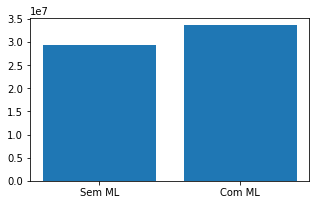

In [189]:
ML = ['Sem ML', 'Com ML']
balanco = [Balanco_sem_ML, Balanco_com_ML]
 
# Figure Size
fig = plt.figure(figsize =(5, 3))
 
# Horizontal Bar Plot
plt.bar(ML[0:2], balanco[0:2])
 
# Show Plot
plt.show()

## 13.4 Taxa de ganhos com a implementação por número de clientes

- Supondo que aquisição de clientes respeite a proporção de número de interessados / não interessados:

In [190]:
ganhos_por_cliente = ganhos_implementacao/len(df)
print("Ganho com implementação de ML por cliente = {}".format(ganhos_por_cliente))

Ganho com implementação de ML por cliente = 11.295773256469918


## 14 Conclusões e Recomendações Finais 

#### Conclusões gerais e ganhos financeiros

- O maior desconto que poderia ser dado para evitar perdar e agarriar mais clientes é de 2.67%.
- Mesmo após a oferta de 2% de desconto nenhum cliente da base de clientes sem interesse passaria a ter interesse, sendo, portanto, a oferta de desconto geradora de prejuízos.
- Ao realizar o comparativo das operações utilizando-se Machine Learning e sem utilizar há um ganho total de 4.3 Mi com a implementação de Machine Learning.
- Isso equivale a um ganho de 11.36 reais por cliente do seguro de saúde.


#### A função de custo elaborada de acordo com as regras de negocio selecionou um modelo que:

- Acerta 97,76% de clientes interessados (Recall classe 1)
- Acerta 58,78% de Clients não interessados (Recall classe 0)
- AUC: 0.7827 


#### Características do modelo:

- Dado o desbalanceamento das classes e os custos o modelo priorizará o acerto de 1 cliente interessado em detrimento de 107 clientes não interessados.
- Isso equivale a dizer que o modelo priorizará no tradeoff um ganho de +23% (+1) na taxa de acerto de pessoas interessadas em detrimento de -1% na taxa de acertos de pessoas sem interesse.
